In [19]:
#coding:utf-8
import numpy as np
from matplotlib.pylab import *
from scipy import fftpack
from scipy import ceil, complex64, float64, hamming, zeros
%matplotlib inline

# STFT

In [51]:
"""
x : 入力信号
win : 窓関数
step : シフト幅
"""

def stft(x, win, step):
    l = len(x) # 入力信号の長さ
    N = len(win) # 窓幅
    M = int(ceil(float(l - N + step) / step))
    
    new_x = zeros(N + ((M - 1) * step))
    new_x[: l] = x 
    
    X = zeros([M, N], dtype = complex64) # スペクトログラムの初期化
    for m in range(M):
        start = step * m
        X[m, :] = fft(new_x[start : start + N] * win)
    return X

# iSTFT

In [45]:
def istft(X, win, step):
    M, N = X.shape
    assert (len(win) == N), "FFT length and window length are different."

    l = (M - 1) * step + N
    x = zeros(l, dtype = float64)
    wsum = zeros(l, dtype = float64)
    for m in range(M):
        start = step * m
        
        x[start : start + N] = x[start : start + N] + ifft(X[m, :]).real * win
        wsum[start : start + N] += win ** 2 
    pos = (wsum != 0)
    x_pre = x.copy()
    
    ### 窓分のスケール合わせ
    x[pos] /= wsum[pos]
    return x


In [46]:
# 設定
fftlen = 512

dt = 0.01
f = 10
t = np.linspace(1, fftlen, fftlen) * dt - dt
y = np.sin(np.pi * f * t)

win = np.hamming(fftlen)
step = fftlen / 4

In [52]:
spectrogram = stft(y, win, step)
resyn_data = istft(spectrogram, win, step)

/home/accent/.pyenv/versions/3.4.3/lib/python3.4/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/accent/.pyenv/versions/3.4.3/lib/python3.4/site-packages/ipykernel/__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/accent/.pyenv/versions/3.4.3/lib/python3.4/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/accent/.pyenv/versions/3.4.3/lib/python3.4/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/accent/.pyenv/versions/3.4.3/lib/python3.4/site-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


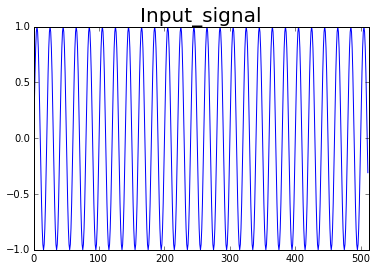

/home/accent/.pyenv/versions/3.4.3/lib/python3.4/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


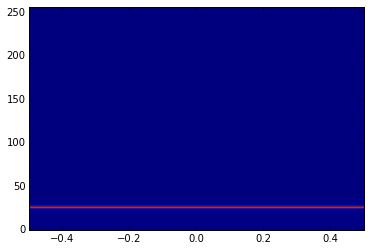

In [50]:
### plot
plot(y)
title("Input_signal", fontsize = 20)
xlim([0, len(y)])
show()

imshow(abs(spectrogram[:, : fftlen / 2 + 1].T), aspect = "auto", origin = "lower")
show()

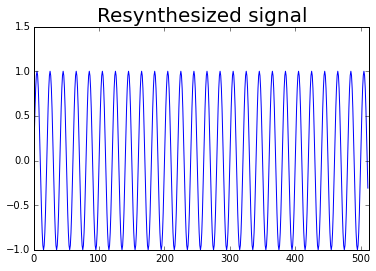

In [49]:
plot(resyn_data)
xlim([0, len(resyn_data)])
title("Resynthesized signal", fontsize = 20)
show()